In [2]:
import tensorflow as tf

from keras.models import load_model

import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

In [3]:
def getOneHotkeyLabels(dataset_image_path_list, index_of_classname):
  onehotkeyLabels = []

  for path in dataset_image_path_list:
    classname = path.split('/')[index_of_classname]

    if classname not in onehotkeyLabels:
      onehotkeyLabels.append(classname)

  return onehotkeyLabels

In [4]:
def predictDatas(model, predict_path, image_width, oneHotkeyLabels):
  for item in os.listdir(predict_path):
    file_path = os.path.join(predict_path, item)

    if os.path.isfile(file_path):
      originalImage = cv2.imread(file_path , cv2.COLOR_BGR2RGB)

      # Convert Gray sys. image to RGB sys.
      if len(originalImage.shape) == 2:
        originalImage = cv2.cvtColor(originalImage, cv2.COLOR_GRAY2RGB)
      
      showImage = cv2.cvtColor(originalImage, cv2.COLOR_RGB2BGR)

      predictData = cv2.resize(originalImage,(image_width,image_width))
      predictData =  np.array(predictData)
      predictData = tf.keras.applications.xception.preprocess_input(predictData)
      predictData = np.reshape(predictData ,(1,image_width,image_width,3))

      predict = model.predict(predictData)

      result = oneHotkeyLabels[np.argmax(predict)]
  
      print('Filename :{} '.format(item))
      print('Predict value : {}'.format(predict))
      print('Predict : {}'.format(result))

      plt.imshow(showImage)
      plt.show()
      print()

In [5]:
path_model = os.path.join(os.getcwd(),'drive','MyDrive','Colab Notebooks','model')
path_dataset_predict = os.path.join(os.getcwd(),'drive','MyDrive','Colab Notebooks','dataset_predict')
path_dataset = os.path.join(os.getcwd(),'drive','MyDrive','Colab Notebooks','dataset')

dataset_image_path_list = list(filter(os.path.isdir, list(map(path_dataset.__add__, map('/'.__add__, os.listdir(path_dataset))))))
dataset_image_path_list.sort()

print('path_model : {} '.format(path_model))
print('path_dataset_predict : {} '.format(path_dataset_predict))
print('dataset_image_path_list : {} '.format(dataset_image_path_list))

path_model : /content/drive/MyDrive/Colab Notebooks/model 
path_dataset_predict : /content/drive/MyDrive/Colab Notebooks/dataset_predict 
dataset_image_path_list : ['/content/drive/MyDrive/Colab Notebooks/dataset/cat', '/content/drive/MyDrive/Colab Notebooks/dataset/dog'] 


In [6]:
image_width = 128

# **Model Loading**

In [7]:
model = load_model(path_model)

# **Data Prediction**

OneHotkeyLabels : ['cat', 'dog'] 

Filename :adorable-white-pomeranian-puppy-spitz-921029690-5c8be25d46e0fb000172effe.jpg 
Predict value : [[0.40356496 0.5964351 ]]
Predict : dog


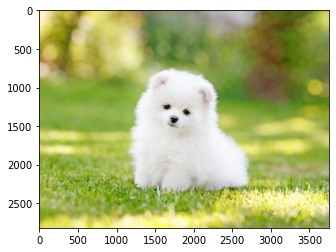


Filename :a644b1dd08260376acf6dd6f1098debd.jpg 
Predict value : [[0.9943551  0.00564491]]
Predict : cat


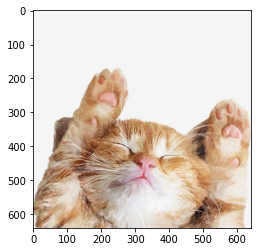


Filename :mock_ST_newSadCat.jpg 
Predict value : [[0.98905003 0.01094996]]
Predict : cat


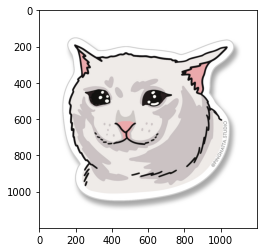


Filename :322868_1100-800x825.jpg 
Predict value : [[1.964110e-04 9.998036e-01]]
Predict : dog


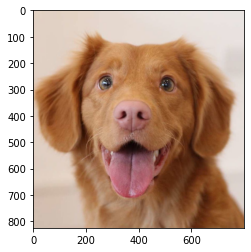


Filename :pexels-tranmautritam-2286016.jpg 
Predict value : [[9.9999201e-01 8.0167865e-06]]
Predict : cat


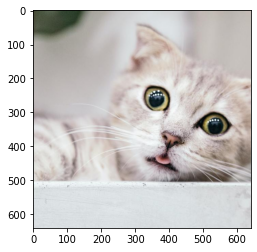


Filename :V1zvs4ts_400x400.jpg 
Predict value : [[0.76363873 0.23636131]]
Predict : cat


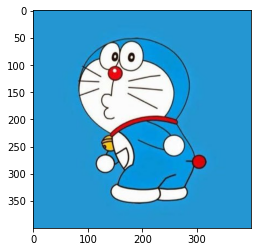


Filename :น้องหมาภายในงาน-4.jpg 
Predict value : [[0.50835437 0.49164557]]
Predict : cat


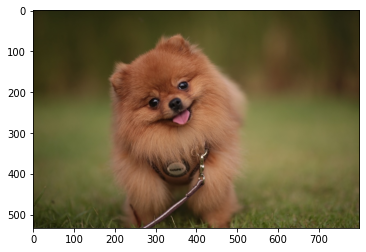


Filename :1-อาเล็ก-ธีรเดช-น้องหมาด็อปบี้2.jpg 
Predict value : [[2.2827783e-04 9.9977177e-01]]
Predict : dog


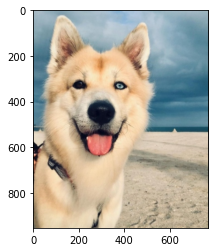


Filename :_107499038__99598295_gettyimages-95572844.jpg 
Predict value : [[2.1462359e-04 9.9978536e-01]]
Predict : dog


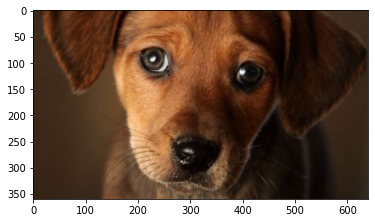


Filename :563000005487801.jfif 
Predict value : [[0.05057053 0.94942945]]
Predict : dog


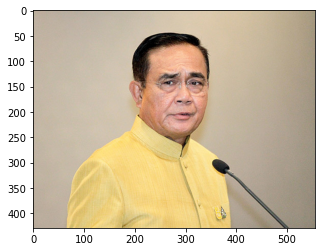

In [8]:
oneHotkeyLabels = getOneHotkeyLabels(dataset_image_path_list, 6)

print("==================================================")
print('OneHotkeyLabels : {} '.format(oneHotkeyLabels))
print("==================================================\n")

predictDatas(model, path_dataset_predict, image_width, oneHotkeyLabels)